# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [28]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [29]:
import pandas as pd


indice_maximo_precio = ds['price'].idxmax()

direccion = ds.loc[indice_maximo_precio, 'address']
precio = ds.loc[indice_maximo_precio, 'price']
print(f"La casa con dirección en {direccion} es la más cara y su precio es de {precio} USD")


La casa con dirección en El Escorial es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [30]:
import pandas as pd
import numpy as np


# Limpiar base de datos
ds = ds[ds['price'] > 0]

indice_minimo_precio = ds['price'].idxmin()

direccion = ds.loc[indice_minimo_precio, 'address']
precio = ds.loc[indice_minimo_precio, 'price']

print(f"La casa con dirección en {direccion} es la más barata y su precio es de {precio} USD")


La casa con dirección en Berlin, Coslada es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [31]:
import pandas as pd
import numpy as np


# Limpiar base de datos
ds = ds[ds['surface'] > 0]

# Encontrar el área máxima
indice_maximo_area = ds['surface'].idxmax()

direccion_grande = ds.loc[indice_maximo_area, 'address']
area_grande = ds.loc[indice_maximo_area, 'surface']

indice_minimo_area = ds['surface'].idxmin()

direccion_pequena = ds.loc[indice_minimo_area, 'address']
area_pequena = ds.loc[indice_minimo_area, 'surface']

print(f"La casa más grande está ubicada en {direccion_grande} y su superficie es de {area_grande} metros")
print(f"La casa más pequeña está ubicada en {direccion_pequena} y su superficie es de {area_pequena} metros")

La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [32]:
import pandas as pd


poblaciones = ds['level5'].unique()

print(poblaciones)

['Arganda del Rey' 'Boadilla del Monte' 'Fuenlabrada'
 'Las Rozas de Madrid' ' Madrid Capital' 'Villaviciosa de Odón' 'Pinto'
 'Valdemoro' 'Navalcarnero' 'Pozuelo de Alarcón' 'Torrejón de Ardoz'
 'Navalagamella' 'San Sebastián de los Reyes' 'Rivas-vaciamadrid'
 'Alpedrete' 'Móstoles' 'San Fernando de Henares' 'Coslada'
 'Becerril de la Sierra' 'Alcalá de Henares' 'Chinchón' 'Parla' 'Alcorcón'
 'El Escorial' 'Leganés' 'Pedrezuela' 'Majadahonda'
 'Villanueva de la Cañada' 'Villanueva del Pardillo' 'Torrelodones'
 'Moralzarzal' 'Mejorada del Campo' 'Aranjuez' 'Corpa' 'Getafe'
 'Velilla de San Antonio' 'Sevilla la Nueva' 'San Martín de la Vega'
 'Villalbilla' 'Collado Villalba' 'Alcobendas' 'El Molar (Madrid)'
 'Moraleja de Enmedio' 'Algete' 'Campo Real' 'Torrejón de la Calzada'
 'Colmenar Viejo' 'Valdemorillo' 'Fuente El Saz de Jarama' 'Tres Cantos'
 'Arroyomolinos (Madrid)' 'Griñón' 'Paracuellos de Jarama' 'Guadarrama'
 'Titulcia' 'Galapagar' 'Collado Mediano' 'Los Molinos'
 'San Lorenzo

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [33]:
import pandas as pd
import numpy as np


# Comprobar si hay valores nulos
tiene_nas = ds.isnull().values.any()

if tiene_nas:
    print("El dataset contiene valores nulos.")
    print(ds.isnull())
else:
    print("El dataset no contiene valores nulos.")


El dataset contiene valores nulos.
       Unnamed: 0  id_realEstates  isNew  realEstate_name  phone_realEstate  \
0           False           False  False            False             False   
2           False           False  False            False             False   
3           False           False  False            False             False   
4           False           False  False            False             False   
5           False           False  False            False             False   
...           ...             ...    ...              ...               ...   
15330       False           False  False            False             False   
15331       False           False  False            False             False   
15332       False           False  False            False             False   
15333       False           False  False            False             False   
15334       False           False  False            False             False   

       url_inmue

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [34]:
import pandas as pd


original_shape = ds.shape

ds_sin_nas = ds.dropna()

nuevo_shape = ds_sin_nas.shape

print("Dimensiones originales:", original_shape)
print("Dimensiones después de eliminar NAs:", nuevo_shape)


Dimensiones originales: (14030, 37)
Dimensiones después de eliminar NAs: (0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [35]:
import pandas as pd

arroyomolinos = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

# Calcular media
media_precio_arroyomolinos = arroyomolinos['price'].mean()

print("El precio medio de las propiedades en Arroyomolinos (Madrid) es:", media_precio_arroyomolinos)


El precio medio de las propiedades en Arroyomolinos (Madrid) es: 299892.6923076923


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


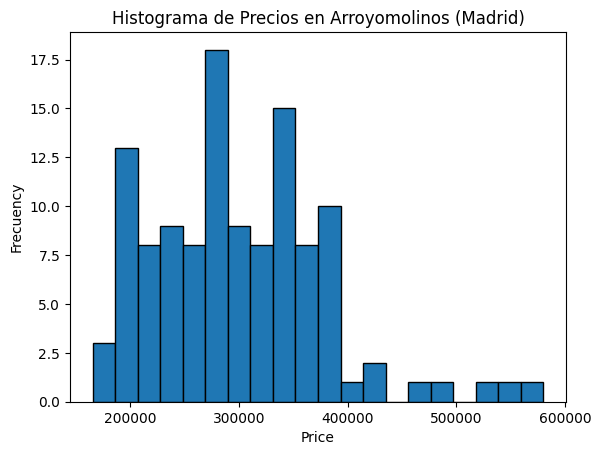

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtramos los datos de Arroyomolinos
arroyomolinos = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

plt.hist(arroyomolinos['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frecuency')
plt.title('Histograma de Precios en Arroyomolinos (Madrid)')
plt.show()


Este histograma analiza la frecuencia, el rango de precios, y los outliers (casos atípicos) de las propiedades en Arroyomolinos (Madrid). Este tipo de análisis ayuda a entender mejor el mercado inmobiliario en la zona, ya que permite observar cómo se distribuyen los precios de las propiedades.

Al observar la distribución de precios, podemos asumir también el nivel socioeconómico del sector, puesto que áreas con precios más altos suelen estar asociadas con un nivel de vida más elevado. y la identificación de outliers puede señalar propiedades excepcionales o casos de precios "irreales" en comparación con la media del mercado.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [37]:
import pandas as pd
import numpy as np

# Limpieza de datos
ds.dropna(subset=['price'], inplace=True)

Q1 = ds['price'].quantile(0.25)
Q3 = ds['price'].quantile(0.75)
IQR = Q3 - Q1
ds = ds[~((ds['price'] < (Q1 - 1.5 * IQR)) | (ds['price'] > (Q3 + 1.5 * IQR)))]

# Filtrar datos
valdemorillo = ds[ds['level5'] == 'Valdemorillo']
galapagar = ds[ds['level5'] == 'Galapagar']

promedio_valdemorillo = valdemorillo['price'].mean()
promedio_galapagar = galapagar['price'].mean()

print("Precio promedio en Valdemorillo:", promedio_valdemorillo)
print("Precio promedio en Galapagar:", promedio_galapagar)

if promedio_valdemorillo > promedio_galapagar:
    print("El precio promedio en Valdemorillo es mayor que en Galapagar.")
elif promedio_valdemorillo < promedio_galapagar:
    print("El precio promedio en Galapagar es mayor que en Valdemorillo.")
else:
    print("Los precios promedio en ambas localidades son iguales.")


Precio promedio en Valdemorillo: 352767.3076923077
Precio promedio en Galapagar: 372108.6533333333
El precio promedio en Galapagar es mayor que en Valdemorillo.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [38]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

#  columna 'pps' 
ds['pps'] = ds['price'] / ds['surface']

precio_m2_valdemorillo = ds[ds['level5'] == "Valdemorillo"]['pps'].mean()

precio_m2_galapagar = ds[ds['level5'] == "Galapagar"]['pps'].mean()

# Imprimir los promedios de precio por metro cuadrado
print(f"El precio promedio por metro cuadrado en Valdemorillo es de {precio_m2_valdemorillo:.2f} USD/m²")
print(f"El precio promedio por metro cuadrado en Galapagar es de {precio_m2_galapagar:.2f} USD/m²")

# Conclusión
if precio_m2_valdemorillo == precio_m2_galapagar:
    print("Los precios promedios por metro cuadrado en Valdemorillo y Galapagar son iguales.")
else:
    print("Los precios promedios por metro cuadrado en Valdemorillo y Galapagar son diferentes.")


El precio promedio por metro cuadrado en Valdemorillo es de 1317.95 USD/m²
El precio promedio por metro cuadrado en Galapagar es de 1606.32 USD/m²
Los precios promedios por metro cuadrado en Valdemorillo y Galapagar son diferentes.


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

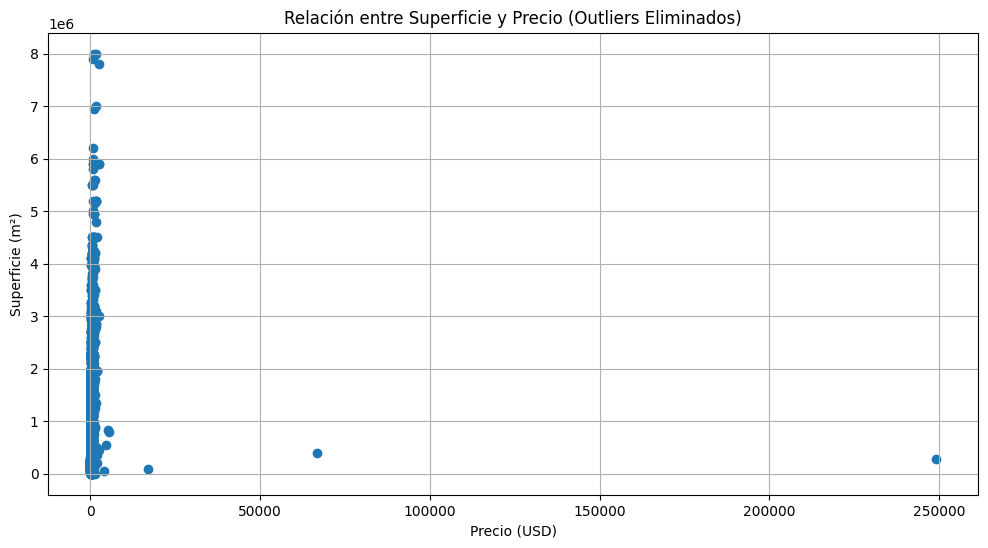

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

ds = pd.read_csv('assets/real_estate.csv', sep=';')

z_scores_price = stats.zscore(ds['price'])
outliers_price = ds[abs(z_scores_price) > 50000]

cleaned_ds = ds.copy() 
cleaned_ds.drop(outliers_price.index, inplace=True) 

plt.figure(figsize=(12, 6))
plt.scatter(ds['surface'], cleaned_ds['price'])
plt.ylabel('Superficie (m²)')
plt.xlabel('Precio (USD)')
plt.title('Relación entre Superficie y Precio (Outliers Eliminados)')
plt.grid(True)
plt.show()

En algunas áreas, las propiedades con superficies similares pueden tener precios muy diferentes, lo que podría deberse a variaciones en el nivel socioeconómico del barrio, la antigüedad de la propiedad, o incluso la demanda del mercado en ese momento.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [40]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

numero_de_agencias = ds['realEstate_name'].nunique()

print(f"El número de agencias de bienes raíces en el dataset es: {numero_de_agencias}")




El número de agencias de bienes raíces en el dataset es: 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [41]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds[ds['price'] > 0]
ds = ds[ds['surface'] > 0]

poblacion_con_mas_casas = ds['level5'].value_counts().idxmax()
numero_de_casas = ds['level5'].value_counts().max()

# población con mayor cantidad de casas y número 
print(f"La población con mayor cantidad de casas es {poblacion_con_mas_casas} con un total de {numero_de_casas} casas.")


La población con mayor cantidad de casas es  Madrid Capital con un total de 6228 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [42]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]

# Subconjunto
print(ds_cinturon_sur.head())


     Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
1             2       153867863  False  tecnocasa fuenlabrada ferrocarril   
3             4       152776331  False  tecnocasa fuenlabrada ferrocarril   
85           86       153152077  False            sinergical inmobiliaria   
94           95       153995577  False                    viviendas365com   
109         110       153586414  False    area uno asesores inmobiliarios   

     phone_realEstate                                       url_inmueble  \
1         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
85                NaN  https://www.fotocasa.es/es/comprar/vivienda/le...   
94        911226014.0  https://www.fotocasa.es/es/comprar/vivienda/le...   
109       912664081.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

     rooms  bathrooms  surface   price  ... level4Id level5Id level6Id  \
1     

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

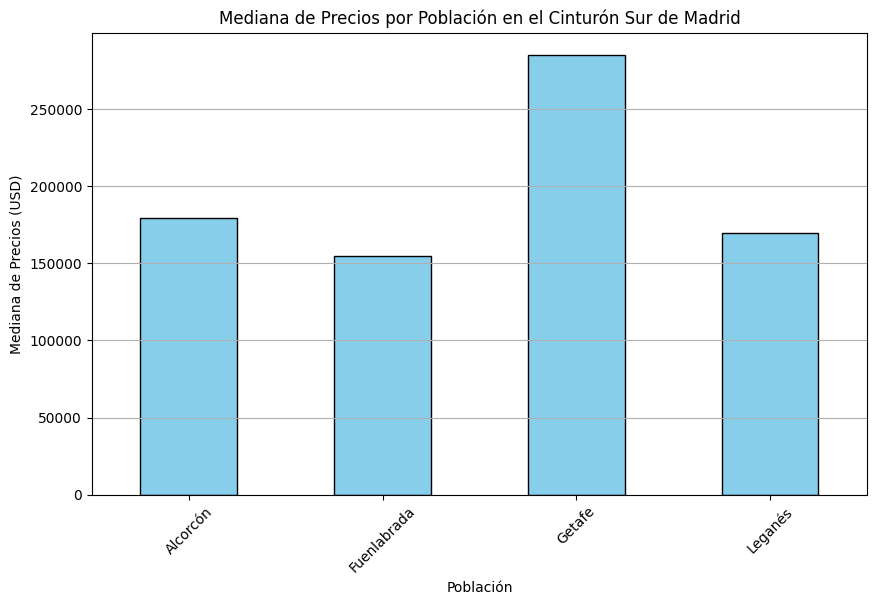

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]

# Calcular la mediana 
mediana_precios = ds_cinturon_sur.groupby('level5')['price'].median()

# Trazar el gráfico 
plt.figure(figsize=(10, 6))
mediana_precios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mediana de Precios por Población en el Cinturón Sur de Madrid')
plt.xlabel('Población')
plt.ylabel('Mediana de Precios (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Este tipo de análisis es útil para entender las diferencias en el mercado inmobiliario entre estas áreas.

Observamos que la mediana de precios varía entre las poblaciones, lo que refleja diferencias en el valor percibido de las propiedades, la demanda, o el nivel socioeconómico de cada área. Por ejemplo, si "Getafe" tiene una mediana de precios más alta que "Fuenlabrada", esto podría indicar que Getafe es un área más deseada o con propiedades de mayor valor en comparación con Fuenlabrada.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [44]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]

# Calcular la media y varianza para las variables
variables = ['price', 'rooms', 'surface', 'bathrooms']

for variable in variables:
    media = ds_cinturon_sur[variable].mean()
    varianza = ds_cinturon_sur[variable].var()
    print(f"Para la variable '{variable}':")
    print(f"Media: {media:.2f}")
    print(f"Varianza de muestra: {varianza:.2f}\n")


Para la variable 'price':
Media: 223094.48
Varianza de muestra: 14921367508.05

Para la variable 'rooms':
Media: 3.02
Varianza de muestra: 0.72

Para la variable 'surface':
Media: 111.75
Varianza de muestra: 4263.05

Para la variable 'bathrooms':
Media: 1.63
Varianza de muestra: 0.57



#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [45]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]

casas_mas_caras = ds_cinturon_sur.loc[ds_cinturon_sur.groupby('level5')['price'].idxmax()]

# Dirección y el precio de cada casa más cara
for index, row in casas_mas_caras.iterrows():
    print(f"La casa más cara en {row['level5']} está ubicada en {row['address']} con un precio de {row['price']} USD")


La casa más cara en Alcorcón está ubicada en Alcorcón con un precio de 950000 USD
La casa más cara en Fuenlabrada está ubicada en Calle de Paulo Freire, 5, Fuenlabrada con un precio de 490000 USD
La casa más cara en Getafe está ubicada en Getafe con un precio de 1050000 USD
La casa más cara en Leganés está ubicada en Avenida Reina Sofía, Leganés con un precio de 650000 USD


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_653/487487773.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cinturon_sur['normalized_price'] = ds_cinturon_sur.groupby('level5')['price'].transform(zscore)


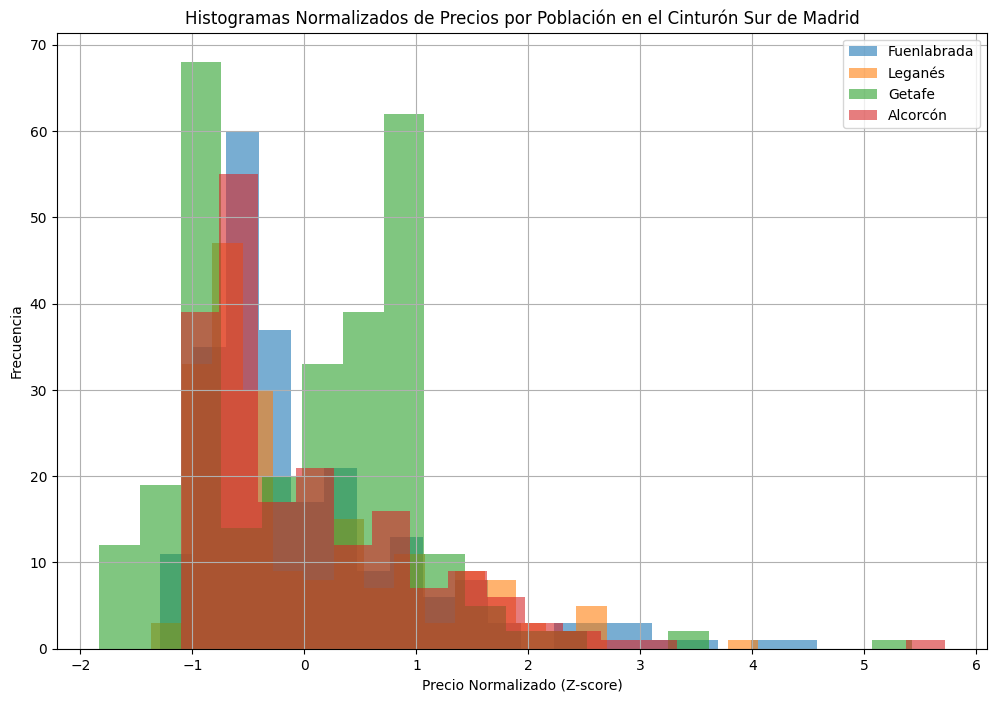

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]

# precios usando Z-score
ds_cinturon_sur['normalized_price'] = ds_cinturon_sur.groupby('level5')['price'].transform(zscore)

# Gráfico
plt.figure(figsize=(12, 8))

# Histograma de cada población
for poblacion in poblaciones_cinturon_sur:
    subset = ds_cinturon_sur[ds_cinturon_sur['level5'] == poblacion]
    plt.hist(subset['normalized_price'], bins=20, alpha=0.6, label=poblacion)

# Título y etiquetas
plt.title('Histogramas Normalizados de Precios por Población en el Cinturón Sur de Madrid')
plt.xlabel('Precio Normalizado (Z-score)')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)

# Mostrar el gráfico
plt.show()


El gráfico muestra la distribución normalizada de los precios de las propiedades en las poblaciones de Fuenlabrada, Leganés, Getafe, y Alcorcón. Al normalizar los precios, podemos comparar las variaciones dentro de cada población sin que el efecto de las diferencias en los valores absolutos distorsione la comparación.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [47]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]

ds_cinturon_sur['pps'] = ds_cinturon_sur['price'] / ds_cinturon_sur['surface']

# Calcular la media del precio por metro cuadrado
pps_getafe = ds_cinturon_sur[ds_cinturon_sur['level5'] == "Getafe"]['pps'].mean()
pps_alcorcon = ds_cinturon_sur[ds_cinturon_sur['level5'] == "Alcorcón"]['pps'].mean()


print(f"El precio promedio por metro cuadrado en Getafe es de {pps_getafe:.2f} USD/m²")
print(f"El precio promedio por metro cuadrado en Alcorcón es de {pps_alcorcon:.2f} USD/m²")


El precio promedio por metro cuadrado en Getafe es de 2066.31 USD/m²
El precio promedio por metro cuadrado en Alcorcón es de 2239.30 USD/m²


/tmp/ipykernel_653/4059260355.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cinturon_sur['pps'] = ds_cinturon_sur['price'] / ds_cinturon_sur['surface']


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

/tmp/ipykernel_653/3367897067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cinturon_sur['pps'] = ds_cinturon_sur['price'] / ds_cinturon_sur['surface']


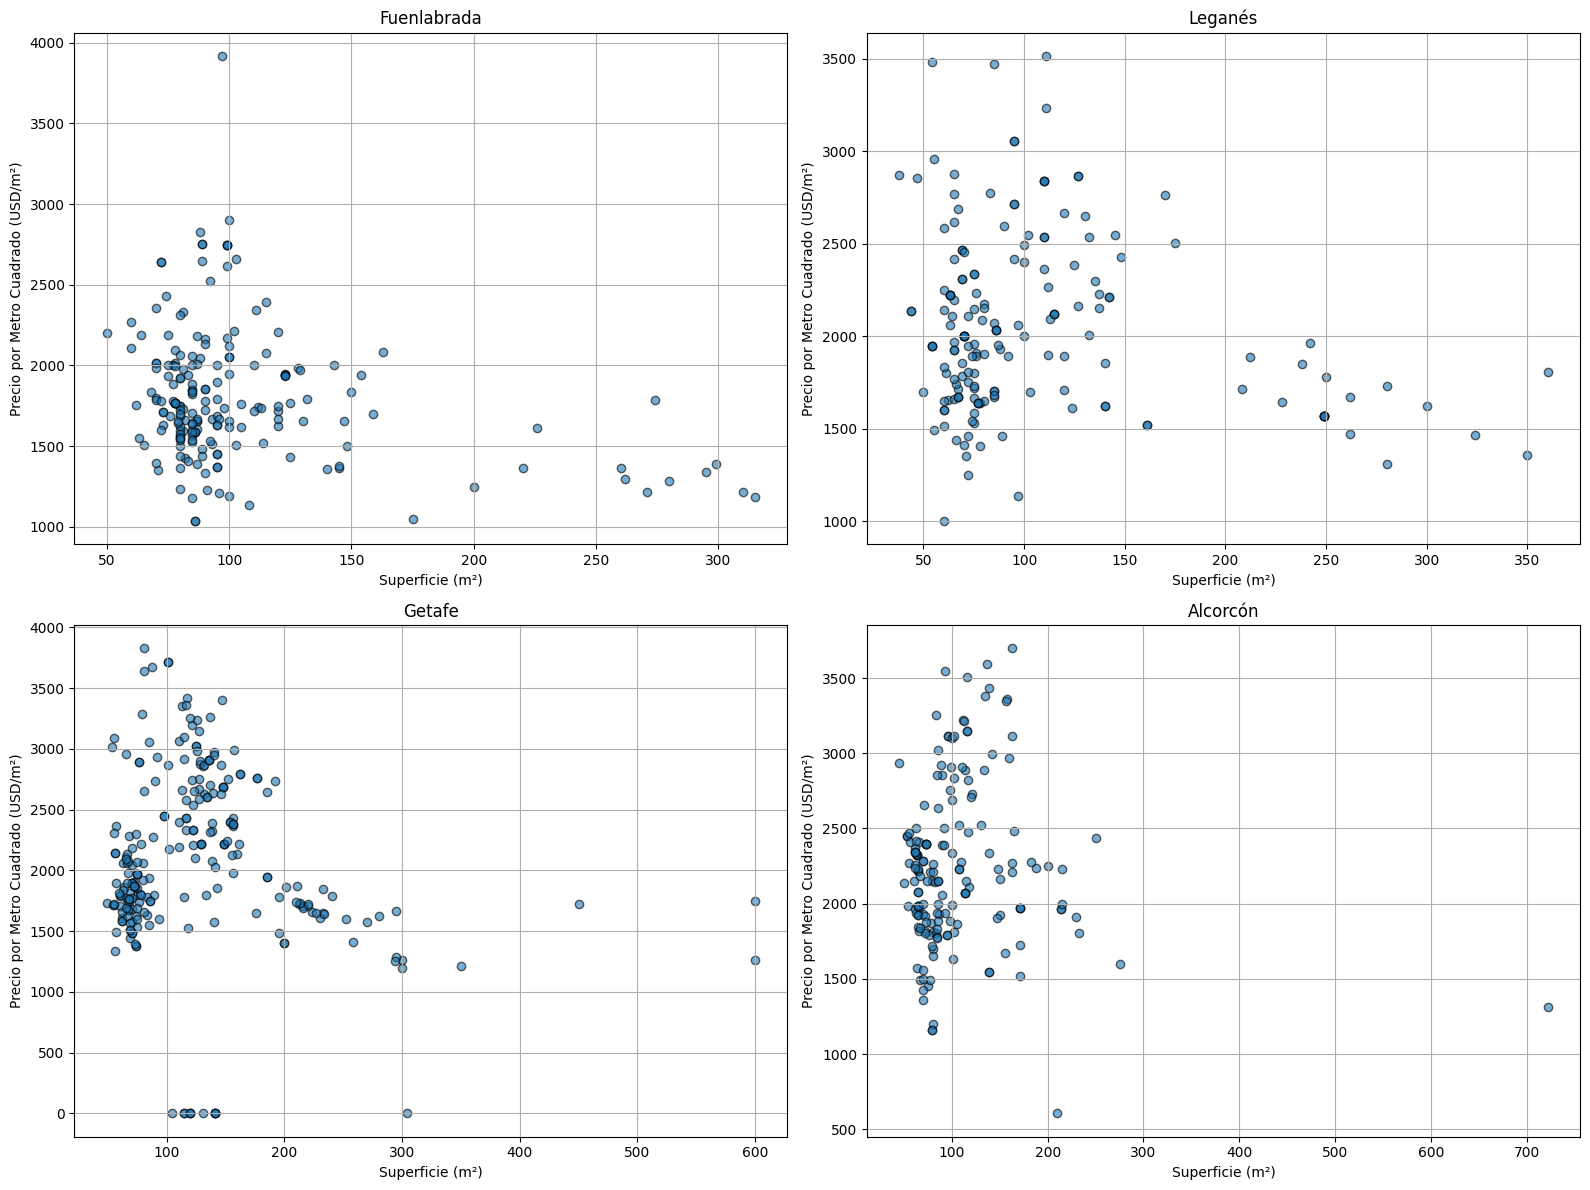

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

ds_cinturon_sur = ds[ds['level5'].isin(poblaciones_cinturon_sur)]
ds_cinturon_sur['pps'] = ds_cinturon_sur['price'] / ds_cinturon_sur['surface']
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
poblaciones = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
axes = axs.flatten()

# Diagramas 
for i, poblacion in enumerate(poblaciones):
    subset = ds_cinturon_sur[ds_cinturon_sur['level5'] == poblacion]
    axes[i].scatter(subset['surface'], subset['pps'], alpha=0.6, edgecolor='black')
    axes[i].set_title(f'{poblacion}')
    axes[i].set_xlabel('Superficie (m²)')
    axes[i].set_ylabel('Precio por Metro Cuadrado (USD/m²)')
    axes[i].grid(True)


plt.tight_layout()

plt.show()


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [49]:
import pandas as pd
from ipyleaflet import Map, Marker, Popup

ds = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

m = Map(zoom=10, min_zoom=5, max_zoom=20, basemap=basemaps.OpenStreetMap.Mapnik)

# Agregar ubicación
for index, row in ds_cinturon_sur.iterrows():
    population = row['level5']
    marker = Marker(
        location=(row['latitude'], row['longitude']),
    )
    popup = Popup(child=HTML(value=f"<b>Población:</b> {population}"))
    marker.popup = popup
    m.add_layer(marker)
    
# Mostrar el mapa
m



Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…